In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bikesharing = pd.read_csv("day.csv")

In [4]:
bikesharing.head(102)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,08-04-2018,2,0,4,0,5,1,2,13.769153,16.22395,83.6250,15.208464,172,1299,1471
98,99,09-04-2018,2,0,4,0,6,0,2,14.042500,17.07645,87.7500,8.916561,879,1576,2455
99,100,10-04-2018,2,0,4,0,0,0,2,17.493347,21.33685,85.7500,9.833389,1188,1707,2895
100,101,11-04-2018,2,0,4,0,1,1,2,24.421732,28.26085,71.6956,21.739758,855,2493,3348


### Data Understanding and Cleaning

In [5]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Let's check for if the dataframe has any null values or duplicated rows

In [7]:
bikesharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bikesharing[bikesharing.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


There aren't any null values or duplicated rows in the dataframe.

We know that the cnt = registered + casual. Hence, there is no meaning to keeping `registered` and `casual` in the dataset as we already know the relationship between these and the target variables.

In [9]:
columns_to_drop = []
columns_to_drop.append('registered')
columns_to_drop.append('casual')

We also see that instant is just the record index and has no meaning in our context.

In [10]:
columns_to_drop.append('instant')

We see that the date has already been derived into year, month and day of the week. Hence we can remove `dteday`.

In [11]:
columns_to_drop.append('dteday')

In [12]:
columns_to_drop

['registered', 'casual', 'instant', 'dteday']

In [13]:
bikesharing.drop(columns_to_drop, axis=1, inplace=True)

Now, let's do some exploratory data analysis on the dataframe

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

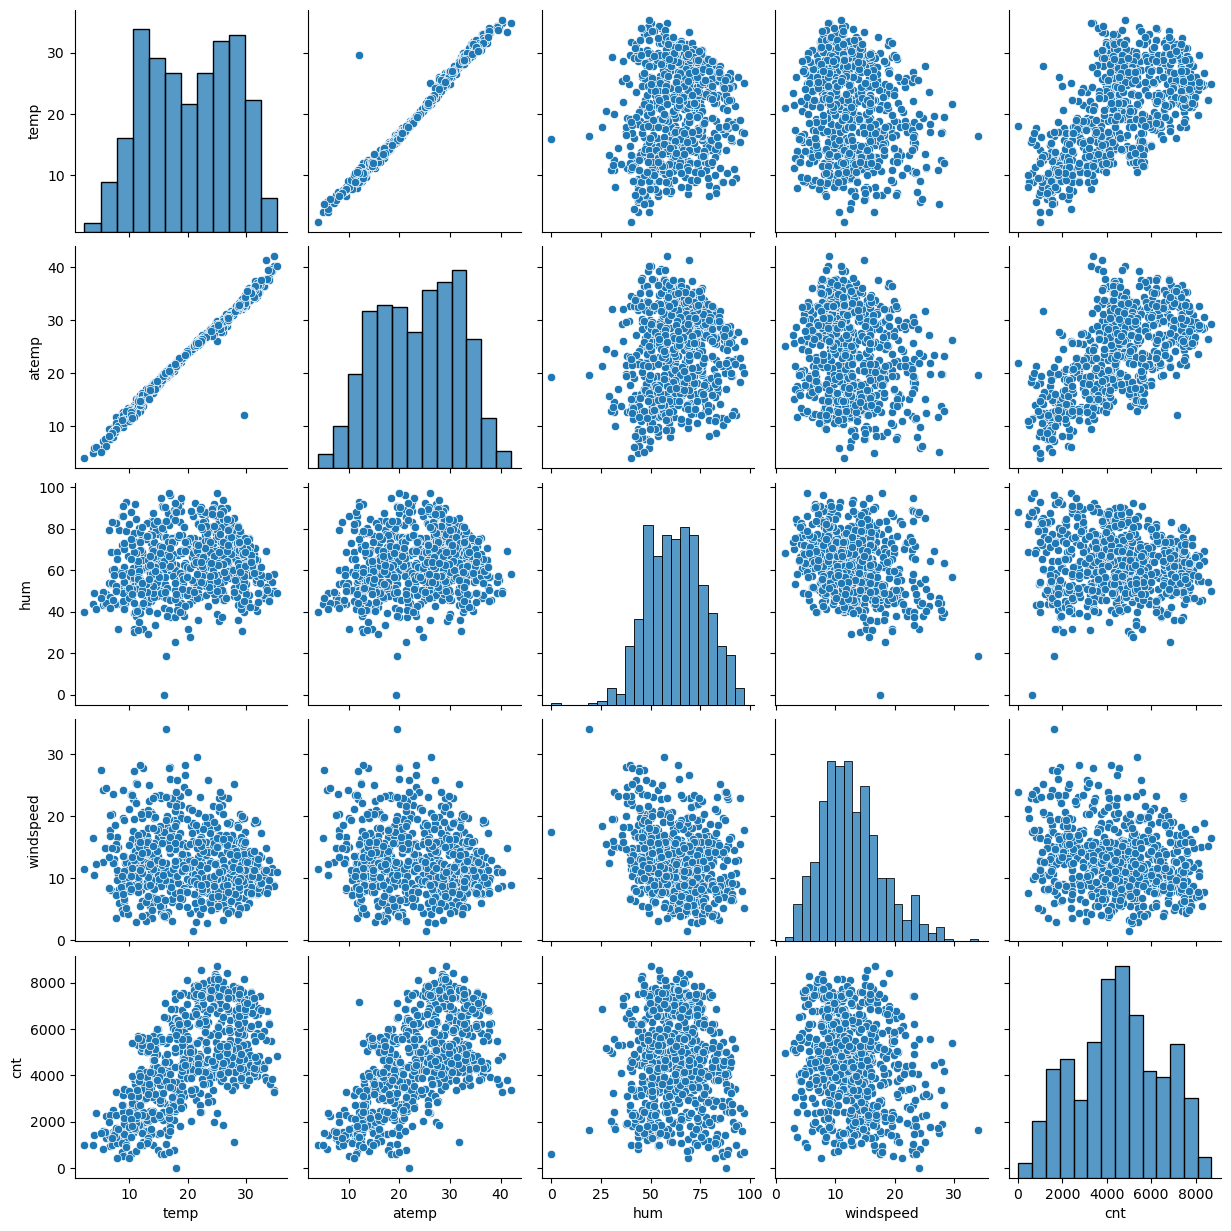

In [15]:
sns.pairplot(bikesharing[['temp','atemp','hum', 'windspeed', 'cnt']])
plt.show()

We can observe here that there is a reasonably linear relationship between the temperature and cnt.

We also see that `atemp` and `temp` are highly linearly related. Let's check the correlation between these columns.

In [16]:
bikesharing['atemp'].corr(bikesharing['temp'])

0.9916961786905648

Now let us carry out exploratory data analysis on the categorical variables.

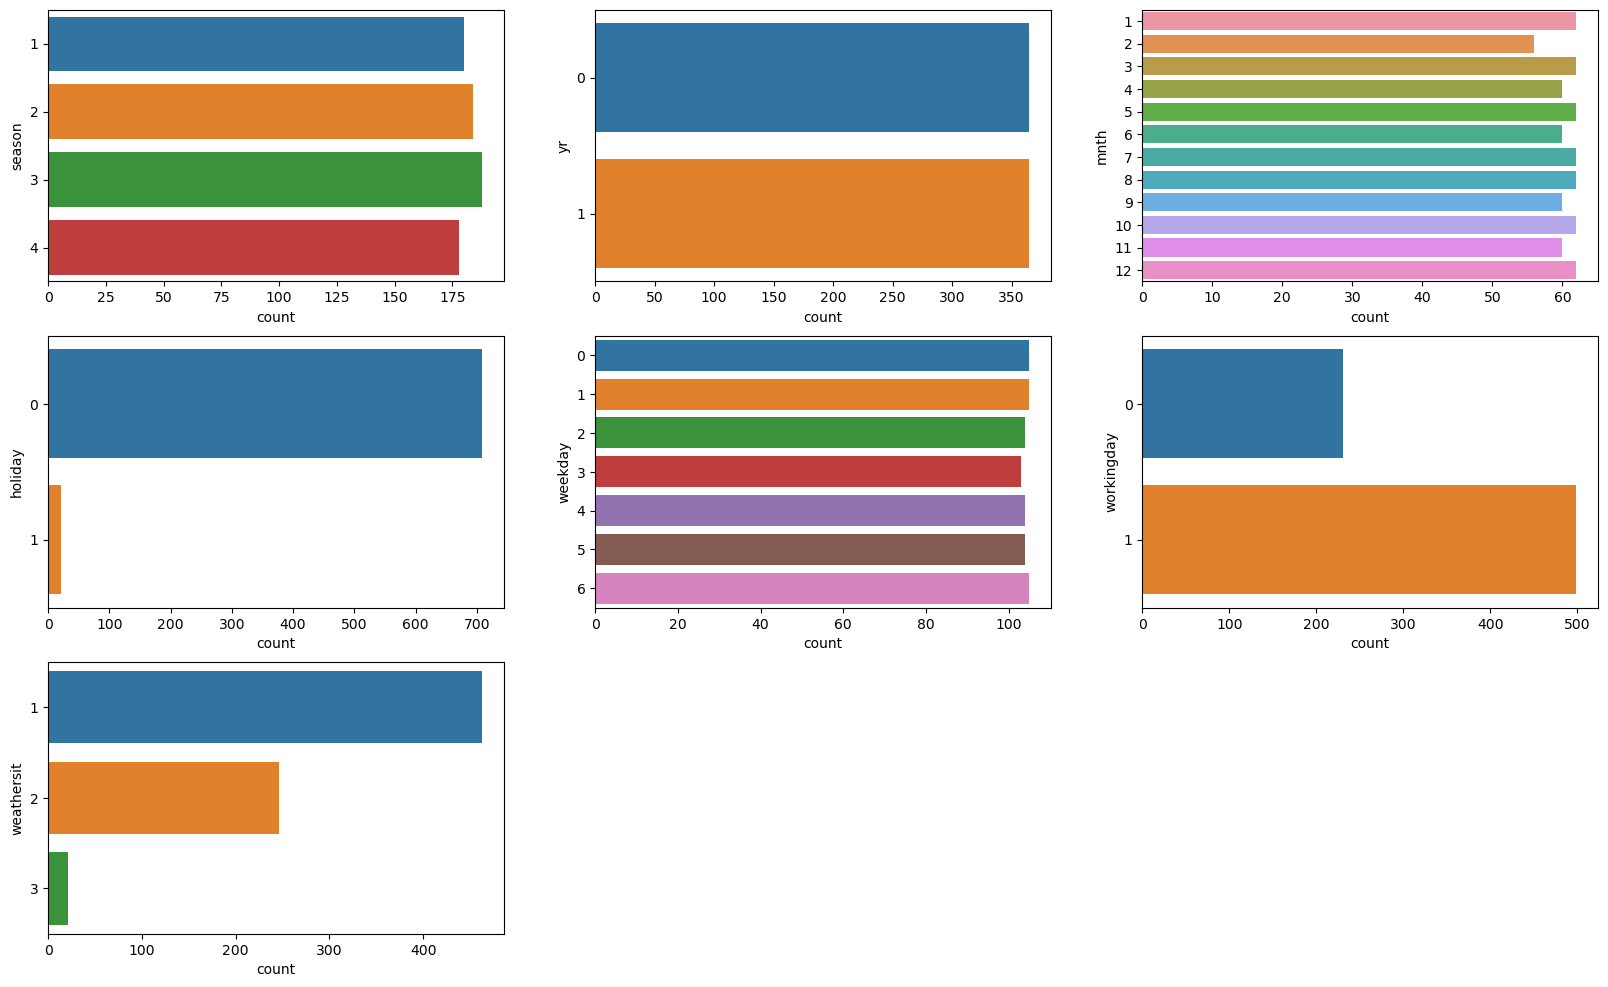

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.countplot(data=bikesharing, y='season')
plt.subplot(3,3,2)
sns.countplot(data=bikesharing, y='yr')
plt.subplot(3,3,3)
sns.countplot(data=bikesharing, y='mnth')
plt.subplot(3,3,4)
sns.countplot(data=bikesharing, y='holiday')
plt.subplot(3,3,5)
sns.countplot(data=bikesharing, y='weekday')
plt.subplot(3,3,6)
sns.countplot(data=bikesharing, y='workingday')
plt.subplot(3,3,7)
sns.countplot(data=bikesharing, y='weathersit')
plt.show()

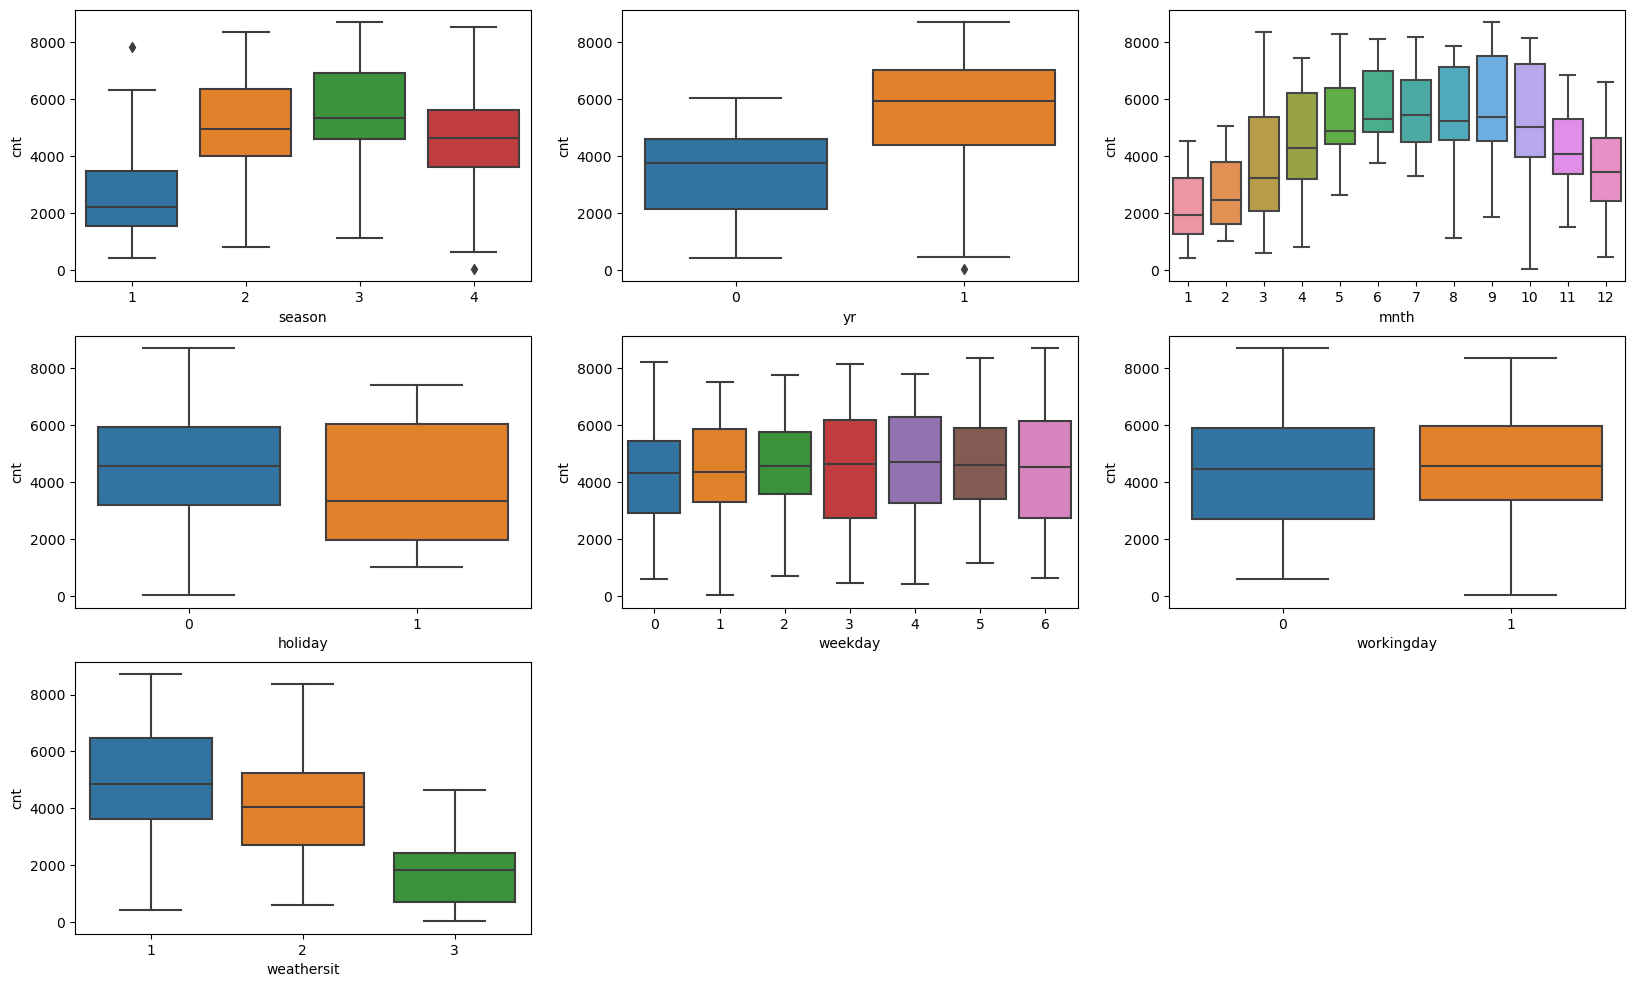

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()

We observe here that cnt clearly varies with `season`, `weathersit`. We also see that 2019 had a much higher demand than the year 2018.

### Dummies for Categorical variables

In [19]:
status = pd.get_dummies(bikesharing['season'], drop_first = True)

In [20]:
bikesharing = pd.concat([bikesharing, status], axis = 1)

In [21]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2,3,4
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [22]:
new_column_names = {
    2: 'season2',
    3: 'season3',
    4: 'season4'
}
bikesharing.rename(columns=new_column_names, inplace=True)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season2,season3,season4
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [23]:
status = pd.get_dummies(bikesharing['mnth'], drop_first = True)
bikesharing = pd.concat([bikesharing, status], axis = 1)

new_column_names = {
    2: 'Feb',
    3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
bikesharing.rename(columns=new_column_names, inplace=True)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [24]:
status = pd.get_dummies(bikesharing['weekday'], drop_first = True)
bikesharing = pd.concat([bikesharing, status], axis = 1)
new_column_names = {
    1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}
bikesharing.rename(columns=new_column_names, inplace=True)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [25]:
status = pd.get_dummies(bikesharing['weathersit'], drop_first = True)
bikesharing = pd.concat([bikesharing, status], axis = 1)
new_column_names = {
    2: 'weather2', 3: 'weather3', 4: 'weather4'
}
bikesharing.rename(columns=new_column_names, inplace=True)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,weather2,weather3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0


In [26]:
bikesharing.drop(columns=['season','mnth','weekday','weathersit'], inplace=True)

In [27]:
bikesharing.shape

(730, 30)

### Test and Train split

In [28]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
df_train.shape

(510, 30)

In [30]:
df_test.shape

(219, 30)

### Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season2', 'season3', 'season4', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Mon', 'Tue', 'Wed',
       'Thu', 'Fri', 'Sat', 'weather2', 'weather3'],
      dtype='object')

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt', 'atemp'] 

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season2,season3,...,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,weather2,weather3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season2,season3,...,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,weather2,weather3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


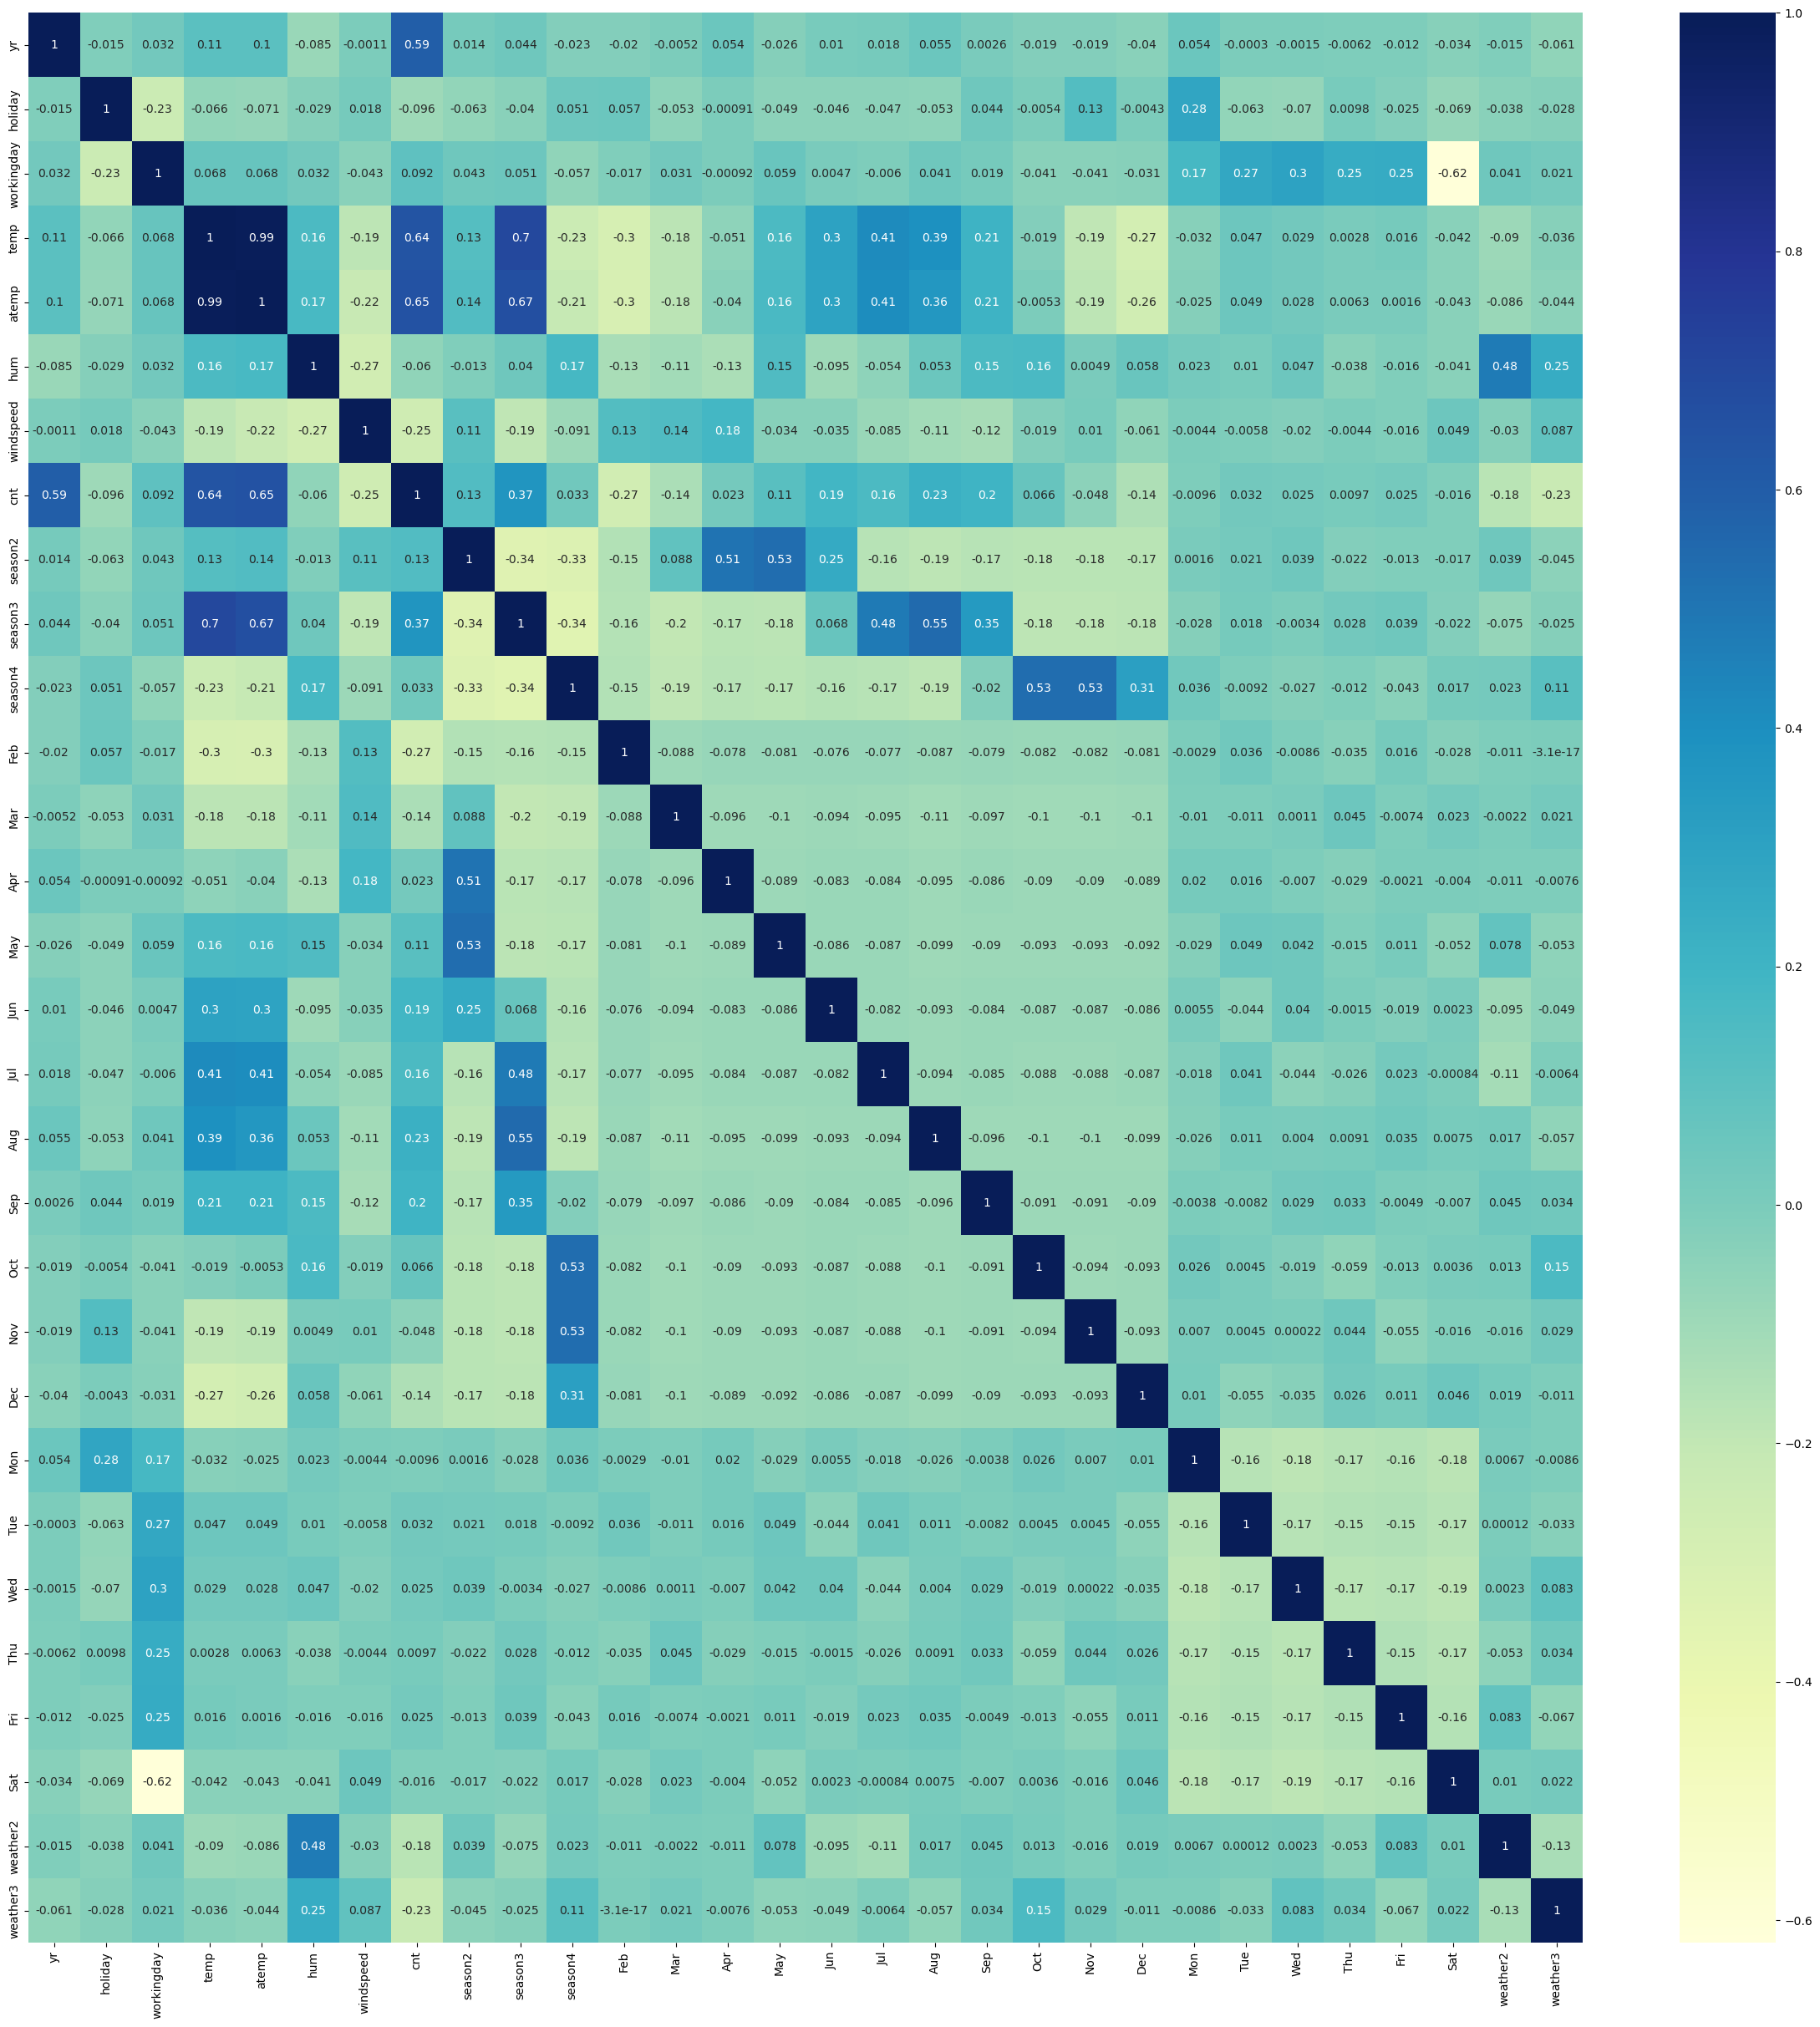

In [37]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We observe here that `cnt` has a high correlation with `temp`. Which means that temperature is an important variable in our analysis.

### Model Building

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

Let us first carry out recursive feature elimination for 15 variables and see what results we get

In [39]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season2', True, 1),
 ('season3', True, 1),
 ('season4', True, 1),
 ('Feb', False, 7),
 ('Mar', False, 2),
 ('Apr', False, 4),
 ('May', False, 3),
 ('Jun', False, 5),
 ('Jul', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 10),
 ('Mon', False, 11),
 ('Tue', False, 12),
 ('Wed', False, 14),
 ('Thu', False, 15),
 ('Fri', False, 13),
 ('Sat', True, 1),
 ('weather2', True, 1),
 ('weather3', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season2',
       'season3', 'season4', 'Aug', 'Sep', 'Oct', 'Sat', 'weather2',
       'weather3'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec', 'Mon',
       'Tue', 'Wed', 'Thu', 'Fri'],
      dtype='object')

We use RFE to help us automatically eliminate features that are insignificant. We then use manual feature elimination to help fine tune the model.

In [44]:
X_train_all = X_train
X_train = X_train[col]

Before we proceed with Model Building, let's define a method that fits a model on the X_train and prints the summary. Let us also define a method that gives us VIF.

In [45]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def fitLinearModel():
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()
    print(lr_1.summary())
    return lr_1

In [47]:
def VIF():
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

### Model 1

Let's a build a model with all the current variables

In [48]:
fitLinearModel()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          1.89e-191
Time:                        23:21:48   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1950      0.029      6.791      0.0

In [49]:
VIF()

      Features    VIF
3         temp  24.06
4          hum  17.47
7      season3   8.19
2   workingday   5.05
5    windspeed   3.88
6      season2   3.44
8      season4   2.88
13    weather2   2.15
0           yr   2.04
12         Sat   1.90
9          Aug   1.85
11         Oct   1.65
10         Sep   1.51
14    weather3   1.19
1      holiday   1.16


We see that `season3` has highest p value and is highly insignificant.

### Model 2

In [50]:
X_train.drop('season3', 1, inplace=True)

In [51]:
fitLinearModel()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          3.24e-192
Time:                        23:21:48   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1945      0.029      6.770      0.0

In [52]:
VIF()

      Features    VIF
4          hum  16.59
3         temp  10.01
2   workingday   5.05
5    windspeed   3.82
7      season4   2.27
12    weather2   2.14
0           yr   2.03
11         Sat   1.90
6      season2   1.83
10         Oct   1.62
8          Aug   1.60
9          Sep   1.34
13    weather3   1.18
1      holiday   1.16


The column `hum` has very high VIF. We will remove it.

### Model 3

In [53]:
X_train.drop('hum', 1, inplace=True)

In [54]:
fitLinearModel()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          6.16e-189
Time:                        23:21:48   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0945      0.019      4.961      0.0

In [55]:
VIF()

      Features   VIF
3         temp  6.38
2   workingday  4.39
4    windspeed  3.60
0           yr  2.02
6      season4  2.02
5      season2  1.82
10         Sat  1.77
9          Oct  1.62
7          Aug  1.59
11    weather2  1.54
8          Sep  1.34
1      holiday  1.12
12    weather3  1.10


`temp` seems to have a very high VIF value, but from our exploratory data analysis we know temperature has a good positive correlation with cnt. We make a business decision of keeping temp. Some other variable in the dataset might be causing this, let's analyze the correlation of temperature with other variables and see.

### Model 5

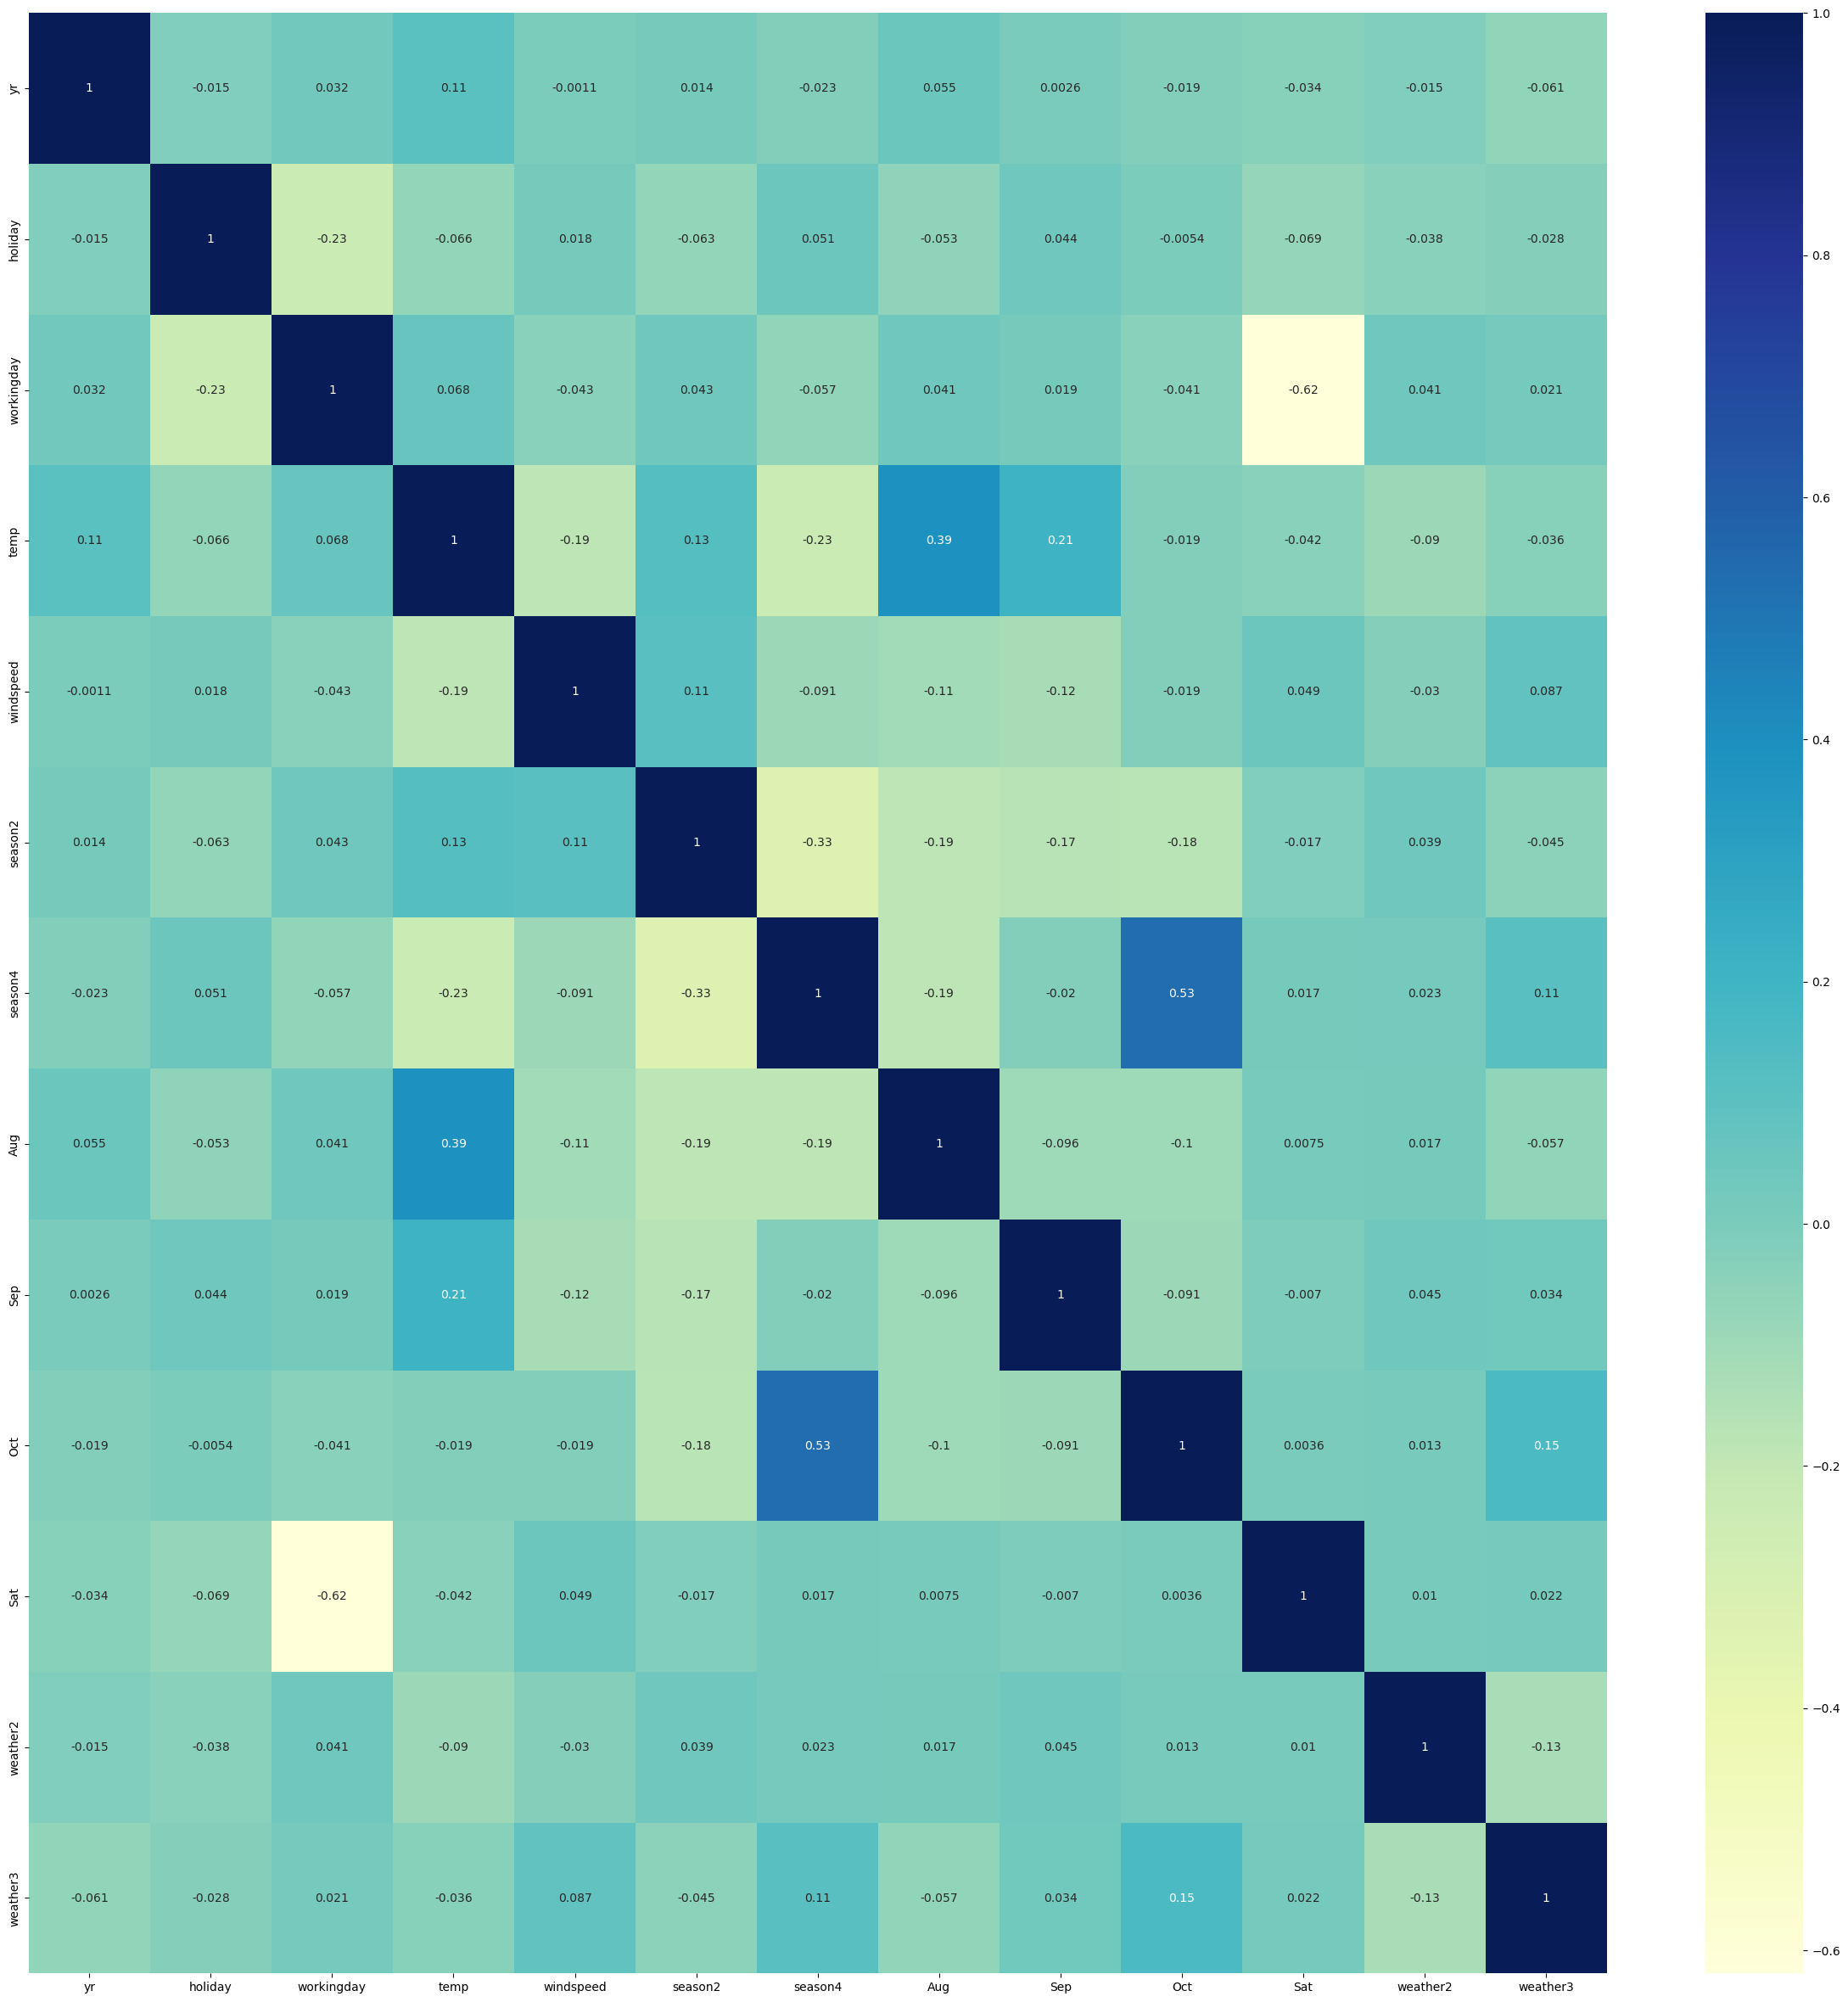

In [56]:
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

The month `Aug` has a high correlation with temperature. Let's remove this and see if this helps reduce the VIF of temp.

In [57]:
X_train.drop('Aug', 1, inplace=True)

In [58]:
fitLinearModel()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.6
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          8.91e-188
Time:                        23:21:49   Log-Likelihood:                 503.02
No. Observations:                 510   AIC:                            -980.0
Df Residuals:                     497   BIC:                            -925.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0879      0.019      4.592      0.0

In [59]:
VIF()

      Features   VIF
3         temp  4.95
2   workingday  4.39
4    windspeed  3.55
0           yr  2.02
6      season4  1.94
9          Sat  1.77
8          Oct  1.60
5      season2  1.57
10    weather2  1.53
7          Sep  1.23
1      holiday  1.12
11    weather3  1.10


`Oct` seems to have a high p value. We remove it.

### Model 6

In [60]:
X_train.drop('Oct', 1, inplace=True)

In [61]:
lm = fitLinearModel()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.8
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          2.92e-188
Time:                        23:21:49   Log-Likelihood:                 501.34
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     498   BIC:                            -927.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0849      0.019      4.443      0.0

In [62]:
VIF()

      Features   VIF
3         temp  4.84
2   workingday  4.35
4    windspeed  3.55
0           yr  2.02
8          Sat  1.76
5      season2  1.57
9     weather2  1.53
6      season4  1.42
7          Sep  1.21
1      holiday  1.12
10    weather3  1.08


### Residual Analysis and Assumptions of linear regression

In [63]:
X_train_lm = sm.add_constant(X_train)
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

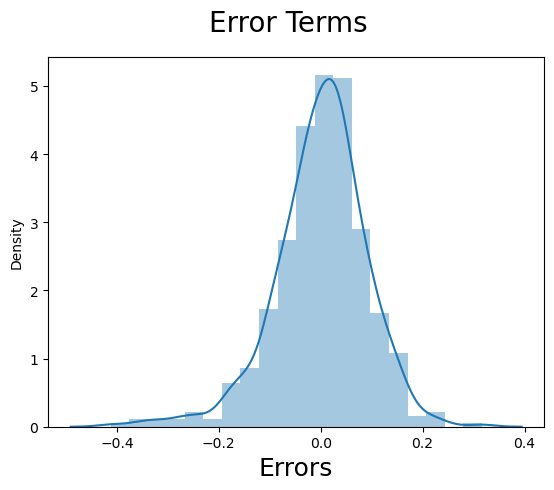

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Error terms are centered around the 0 and are normally distributed.

<Axes: xlabel='cnt'>

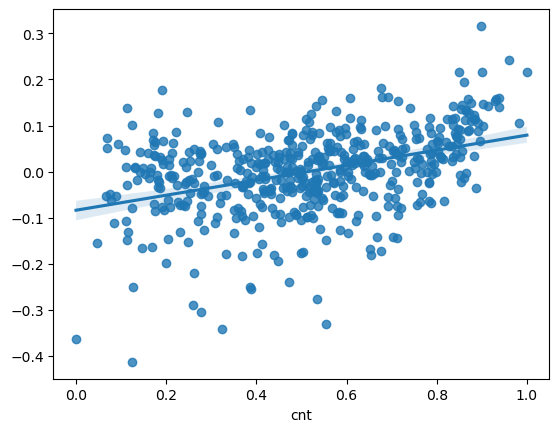

In [65]:
sns.regplot(x=y_train, y=(y_train - y_train_cnt))

The error terms appear independent and have constant variance.

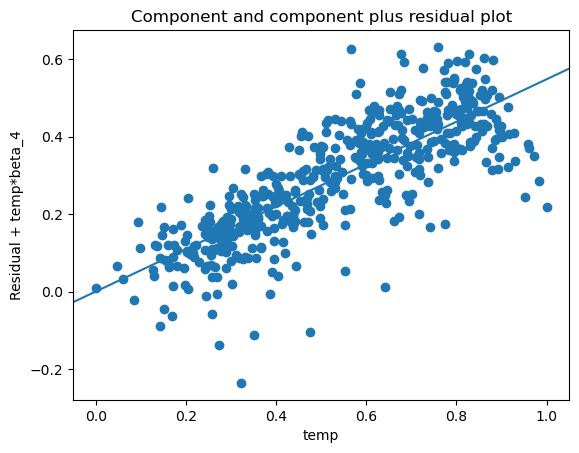

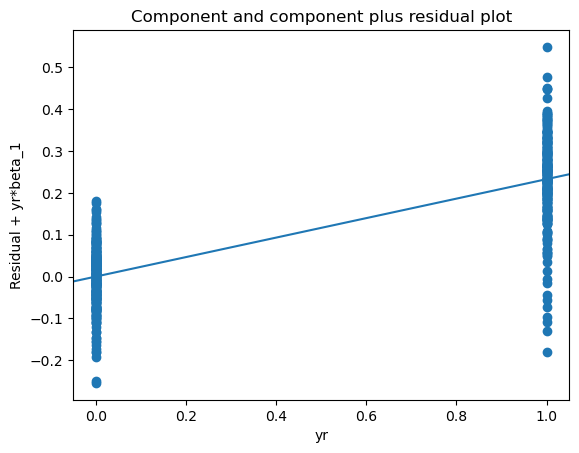

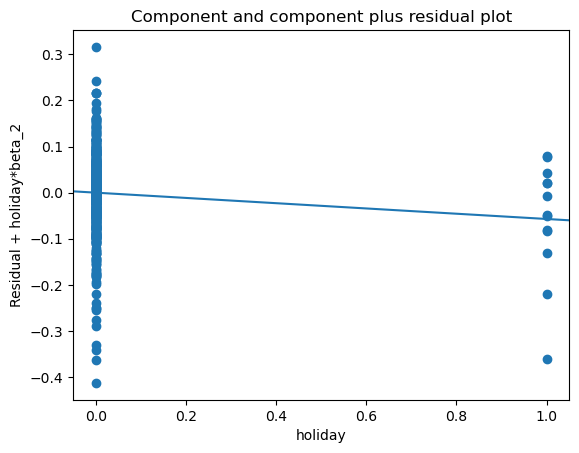

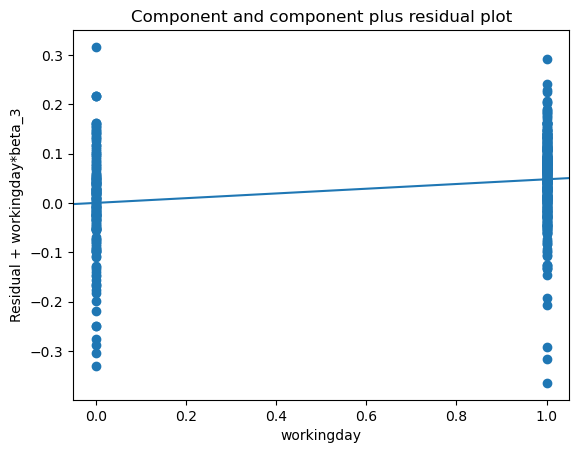

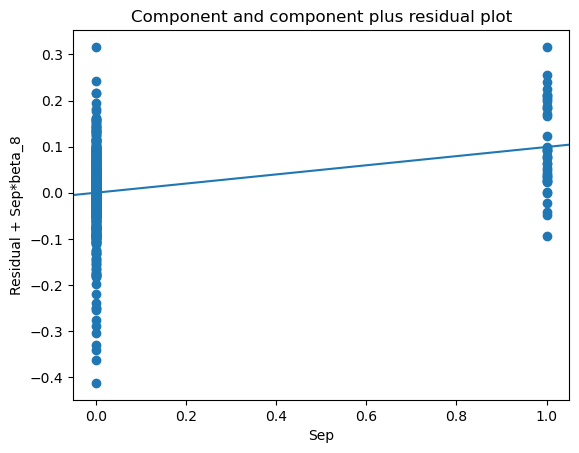

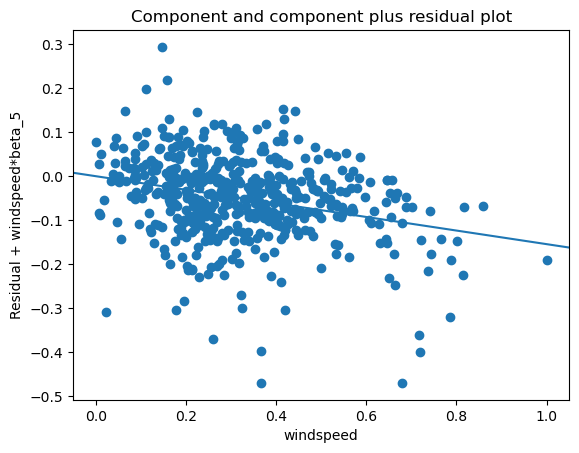

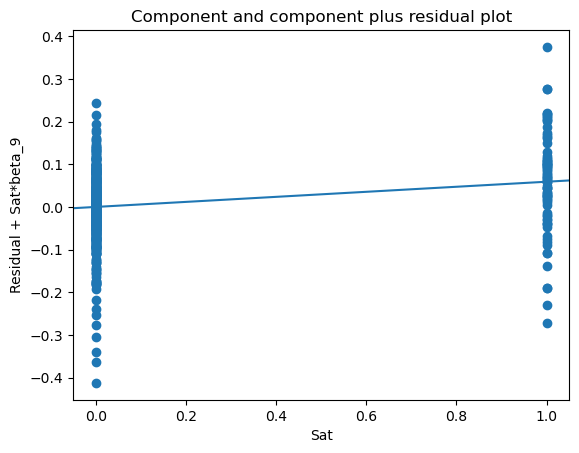

In [66]:
# Linearity

sm.graphics.plot_ccpr(lm, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm, 'yr')
plt.show()

sm.graphics.plot_ccpr(lm, 'holiday')
plt.show()

sm.graphics.plot_ccpr(lm, 'workingday')
plt.show()

sm.graphics.plot_ccpr(lm, 'Sep')
plt.show()

sm.graphics.plot_ccpr(lm, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lm, 'Sat')
plt.show()

### Making final predictions using model

In [67]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt', 'atemp'] 

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [68]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season2,season3,...,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,weather2,weather3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [71]:
X_test_m4.drop(['atemp', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec', 'Mon',
       'Tue', 'Wed', 'Thu', 'Fri'], axis=1, inplace=True)

In [72]:
X_test_m4.drop(['Oct','Aug','hum','season3'], axis=1, inplace=True)

In [73]:
y_pred_m4 = lm.predict(X_test_m4)

### Model Evaluation and Interpretation

Text(0, 0.5, 'y_pred')

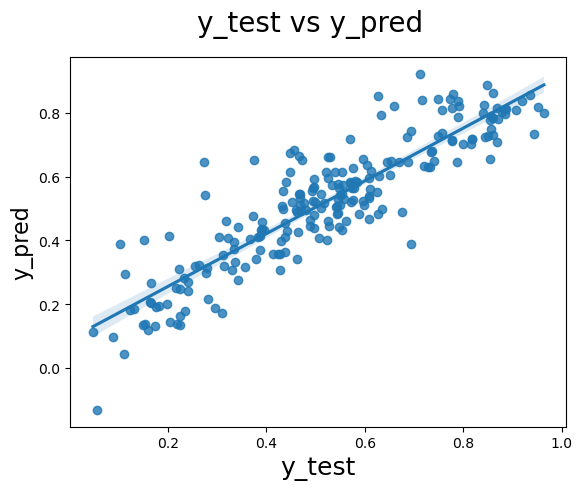

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred_m4, fit_reg=True)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2 = r2_score(y_test, y_pred_m4)
round(r2,4)

0.7963

In [77]:
adjusted_r2 = 1 - (1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)

In [78]:
adjusted_r2

0.7650307486027803

In [79]:
lm.params.round(4)

const         0.0849
yr            0.2329
holiday      -0.0571
workingday    0.0479
temp          0.5477
windspeed    -0.1543
season2       0.0868
season4       0.1321
Sep           0.0992
Sat           0.0591
weather2     -0.0818
weather3     -0.2893
dtype: float64

cnt = 0.0849 + (0.2329 x *yr*) - (0.0571 x *holiday*) + (0.0479 x *workingday*) + (0.5477 x *temp*) - (0.1543 x *windspeed*) + (0.0868 x *summer*) + (0.1321 x *winter*) + (0.0992 x *Sep*) + (0.0591 x *Sat*) - (0.0818 x *misty*) - (0.2893 x *snowy*)

We also see the R squared value for the test set is 79.63% and adjusted R sqauared is 76.5% which is a good model.